In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR
from arch.unitroot import PhillipsPerron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [3]:
df=pd.read_csv('data/final_data.csv', index_col=0)
forex=df.FOREX
forex

DATE
1994-04-01    31.3914
1994-05-01    31.3754
1994-06-01    31.3845
1994-07-01    31.3764
1994-08-01    31.3727
               ...   
2018-08-01    69.6317
2018-09-01    72.2779
2018-10-01    73.5609
2018-11-01    71.7380
2018-12-01    70.8331
Name: FOREX, Length: 297, dtype: float64

<h2>Checking for Stationarity</h2>

In [4]:
adf_test = adfuller(forex)
print('stat=%.3f, p=%.3f' % adf_test[0:2])
if adf_test[1] > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')

stat=-0.480, p=0.896
Probably not Stationary


In [5]:
forex_diff=forex.diff()
forex_diff=forex_diff.dropna()

In [6]:
adf_test = adfuller(forex_diff)
print('stat=%.3f, p=%.3f' % adf_test[0:2])
if adf_test[1] > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')

stat=-6.349, p=0.000
Probably Stationary


In [7]:
kpss_test = kpss(forex_diff, lags='auto')
print('stat=%.3f, p=%.3f' % kpss_test[0:2])
if kpss_test[1] > 0.05:
    print('Probably Stationary')
else:
    print('Probably not Stationary')

stat=0.126, p=0.100
Probably Stationary


/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


<h3>After the first difference, the time series becomes stationary. So we will use first differenced time series</h3>

<h2>ACF and PACF plots</h2>

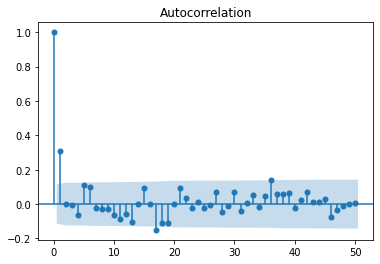

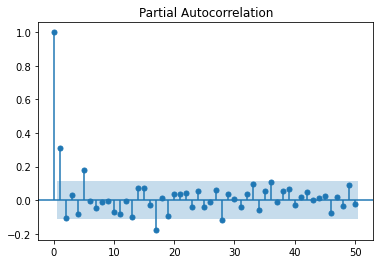

In [8]:
plot_acf(forex_diff, lags=50)
plot_pacf(forex_diff, lags=50)
plt.show()

<h2>Fitting Arima Model</h2>

In [9]:
model_arima = ARIMA(forex_diff[:-30], (4,1,2))
model_arima_fit = model_arima.fit()
model_arima_fit.summary()

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.13262D+00    |proj g|=  2.79880D+00

At iterate    5    f=  1.13207D+00    |proj g|=  3.68151D-02

At iterate   10    f=  1.13206D+00    |proj g|=  1.73726D-01

At iterate   15    f=  1.13206D+00    |proj g|=  3.54139D-04

At iterate   20    f=  1.13206D+00    |proj g|=  3.21294D-03

At iterate   25    f=  1.13206D+00    |proj g|=  2.69411D-03

At iterate   30    f=  1.13206D+00    |proj g|=  1.26708D-03

At iterate   35    f=  1.13206D+00    |proj g|=  3.94902D-03

At iterate   40    f=  1.13206D+00    |proj g|=  4.40026D-04

At iterate   45    f=  1.13206D+00    |proj g|=  4.55191D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.FOREX   No. Observations:                  265
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -299.995
Method:                       css-mle   S.D. of innovations              0.743
Date:                Tue, 02 Nov 2021   AIC                            615.990
Time:                        18:43:52   BIC                            644.628
Sample:                    06-01-1994   HQIC                           627.497
                         - 06-01-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.001      0.732      0.465      -0.001       0.002
ar.L1.D.FOREX    -0.1680      0.189     -0.890      0.374      -0.538       0.202
ar.L2.D.FOREX     0.0425      0.086      0.496      0.620      -0.125       0.210
ar.L3.D.FOREX     0.0313      0.066      0.474      0.636      -0.098       0.161
ar.L4.D.FOREX    -0.1260      0.066     -1.915      0.057      -0.255       0.003
ma.L1.D.FOREX    -0.4899      0.184     -2.657      0.008      -0.851      -0.128
ma.L2.D.FOREX    -0.5101      0.184     -2.778      0.006      -0.870      -0.150
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1676           -1.0343j            1.5598           -0.3846
AR.2           -1.1676           +1.0343j            1.5598            0.3846
AR.3            1.2919           -1.2626j            1.8064           -0.1232
AR.4            1.2919           +1.2626j            1.8064            0.1232
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.9605           +0.0000j            1.9605            0.5000
-----------------------------------------------------------------------------
"""

In [10]:
pred = model_arima_fit.forecast(30, alpha=0.05)[0]
print(pred)

[0.45666937 0.26489401 0.18035674 0.20112612 0.1785353  0.20537796
 0.21186305 0.20924757 0.21430474 0.21082238 0.21137991 0.21228231
 0.21206471 0.21325201 0.21365765 0.2141758  0.21482689 0.215259
 0.21583552 0.21636847 0.21689127 0.21744603 0.21797544 0.21851563
 0.21905521 0.21959054 0.22013008 0.22066736 0.22120514 0.22174341]


In [11]:
forex_diff_pred=forex_diff.copy()
forex_diff_pred[-30:]=pred

In [12]:
forex_pred=forex.shift(1)+forex_diff_pred
forex_pred[0]=31.3914
forex_pred

DATE
1994-04-01    31.391400
1994-05-01    31.375400
1994-06-01    31.384500
1994-07-01    31.376400
1994-08-01    31.372700
                ...    
2018-08-01    68.906291
2018-09-01    69.851830
2018-10-01    72.498567
2018-11-01    73.782105
2018-12-01    71.959743
Name: FOREX, Length: 297, dtype: float64

In [13]:
print("MAE :", mean_absolute_error(forex[-30:],forex_pred[-30:]))
print("RMSE :", math.sqrt(mean_squared_error(forex[-30:],forex_pred[-30:])))

MAE : 0.7258258649672497
RMSE : 0.9325411596807359


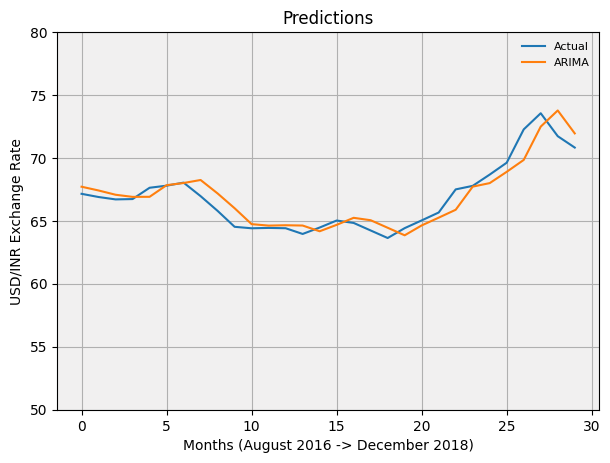

In [14]:
fig,ax=plt.subplots(figsize=(7,5), dpi=100)
ax.set_ylim([50,80])
plt.plot(np.array(forex[-30:]))
plt.plot(np.array(forex_pred[-30:]))
ax.legend(['Actual','ARIMA'],fontsize=8, framealpha=0)
ax.set_facecolor('#f1f0f0')
ax.grid()
ax.set_title('Predictions')
ax.set_xlabel('Months (August 2016 -> December 2018)')
ax.set_ylabel('USD/INR Exchange Rate')
plt.show()

<h2>LSTM RNN Univariate</h2>

In [17]:
def timeseries_to_supervised(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = pd.concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

forex_input=timeseries_to_supervised(forex)

In [26]:
forex_input=forex_input[1:]
forex_input.columns=['FOREX(t-1)','FOREX(t)']
forex_input

,FOREX(t-1),FOREX(t)
DATE,,
1994-05-01,31.3914,31.3754
1994-06-01,31.3754,31.3845
1994-07-01,31.3845,31.3764
1994-08-01,31.3764,31.3727
1994-09-01,31.3727,31.3723
...,...,...
2018-08-01,68.6867,69.6317
2018-09-01,69.6317,72.2779
2018-10-01,72.2779,73.5609


In [37]:
scaler=MinMaxScaler()
df_scaled = scaler.fit_transform(forex_input.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=forex_input.columns,index=forex_input.index)
df_scaled

,FOREX(t-1),FOREX(t)
DATE,,
1994-05-01,0.000453,0.000073
1994-06-01,0.000073,0.000289
1994-07-01,0.000289,0.000097
1994-08-01,0.000097,0.000009
1994-09-01,0.000009,0.000000
...,...,...
2018-08-01,0.884466,0.906866
2018-09-01,0.906866,0.969589
2018-10-01,0.969589,1.000000


In [61]:
values = df_scaled.values
n_train_months = 266
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(266, 1, 1) (266,) (30, 1, 1) (30,)


Epoch 1/20
27/27 - 1s - loss: 0.2724 - val_loss: 0.6025
Epoch 2/20
27/27 - 0s - loss: 0.1408 - val_loss: 0.3719
Epoch 3/20
27/27 - 0s - loss: 0.1009 - val_loss: 0.3076
Epoch 4/20
27/27 - 0s - loss: 0.0988 - val_loss: 0.2872
Epoch 5/20
27/27 - 0s - loss: 0.0907 - val_loss: 0.2592
Epoch 6/20
27/27 - 0s - loss: 0.0838 - val_loss: 0.2322
Epoch 7/20
27/27 - 0s - loss: 0.0757 - val_loss: 0.2010
Epoch 8/20
27/27 - 0s - loss: 0.0683 - val_loss: 0.1704
Epoch 9/20
27/27 - 0s - loss: 0.0596 - val_loss: 0.1354
Epoch 10/20
27/27 - 0s - loss: 0.0514 - val_loss: 0.1008
Epoch 11/20
27/27 - 0s - loss: 0.0423 - val_loss: 0.0614
Epoch 12/20
27/27 - 0s - loss: 0.0321 - val_loss: 0.0206
Epoch 13/20
27/27 - 0s - loss: 0.0260 - val_loss: 0.0203
Epoch 14/20
27/27 - 0s - loss: 0.0173 - val_loss: 0.0242
Epoch 15/20
27/27 - 0s - loss: 0.0168 - val_loss: 0.0184
Epoch 16/20
27/27 - 0s - loss: 0.0171 - val_loss: 0.0193
Epoch 17/20
27/27 - 0s - loss: 0.0169 - val_loss: 0.0195
Epoch 18/20
27/27 - 0s - loss: 0.0170 - 

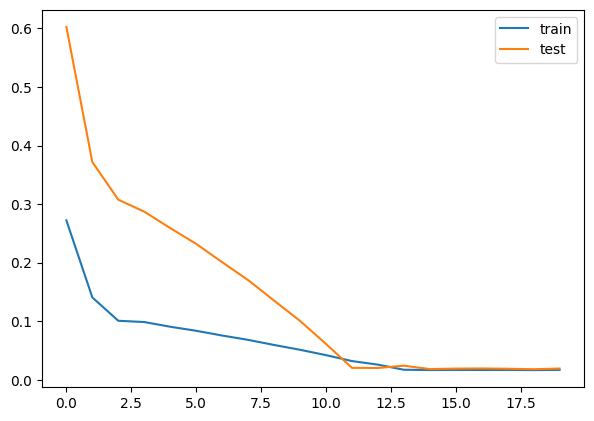

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [66]:
tf.random.set_seed(1234)
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
fig=plt.figure(figsize=(7,5), dpi=100)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
model.summary()

In [67]:
y_pred=model.predict(test_X)
df_pred=df_scaled.copy()
df_pred['FOREX(t)'][-30:]=y_pred[:,0]
df_pred=scaler.inverse_transform(df_pred)
df_pred = pd.DataFrame(df_pred, columns=df_scaled.columns)
df_pred

,FOREX(t-1),FOREX(t)
0,31.3914,31.375400
1,31.3754,31.384500
2,31.3845,31.376400
3,31.3764,31.372700
4,31.3727,31.372300
...,...,...
291,68.6867,69.440120
292,69.6317,70.483739
293,72.2779,73.427916
294,73.5609,74.866675


In [68]:
print("MAE :", mean_absolute_error(forex_input['FOREX(t)'][-30:],df_pred['FOREX(t)'][-30:]))
print("RMSE :", math.sqrt(mean_squared_error(forex_input['FOREX(t)'][-30:],df_pred['FOREX(t)'][-30:])))

MAE : 0.8161036348056789
RMSE : 1.0772105818190894


In [70]:
actual=np.array(forex_input['FOREX(t)'][-30:])
arima=forex_pred[-30:]
lstm=df_pred['FOREX(t)'][-30:]

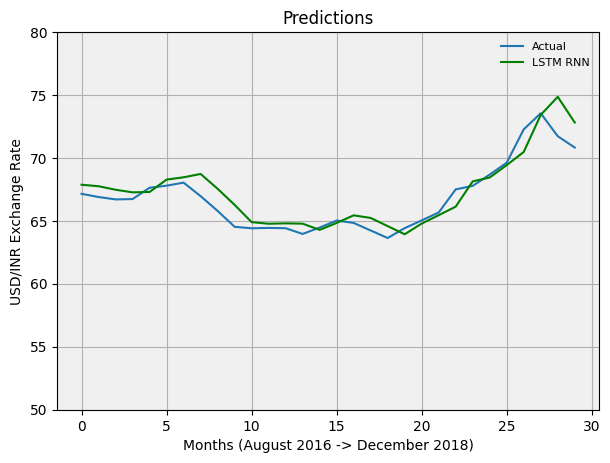

In [71]:
fig,ax=plt.subplots(figsize=(7,5), dpi=100)
ax.set_ylim([50,80])
plt.plot(np.array(forex_input['FOREX(t)'][-30:]))
plt.plot(np.array(df_pred['FOREX(t)'][-30:]), color='green')
ax.legend(['Actual','LSTM RNN'],fontsize=8, framealpha=0)
ax.set_facecolor('#f1f0f0')
ax.grid()
ax.set_title('Predictions')
ax.set_xlabel('Months (August 2016 -> December 2018)')
ax.set_ylabel('USD/INR Exchange Rate')
plt.show()

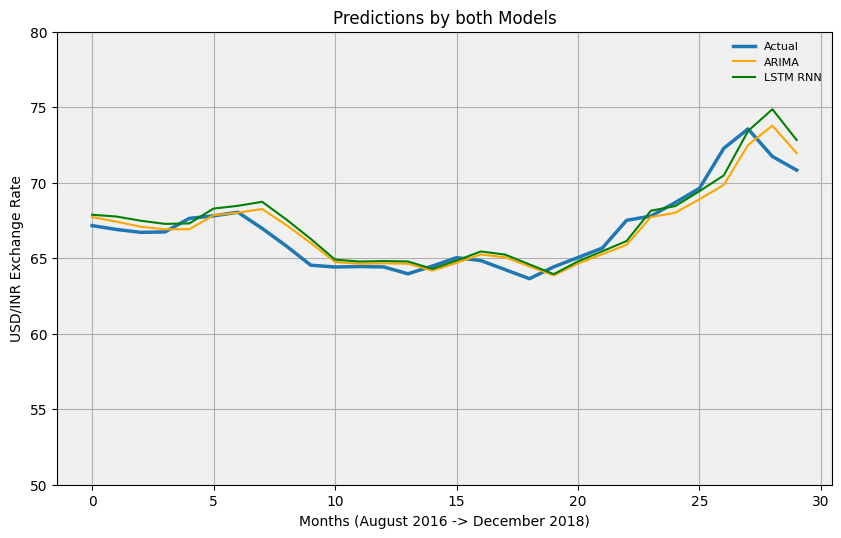

In [72]:
fig,ax=plt.subplots(figsize=(10,6), dpi=100)
ax.set_ylim([50,80])
plt.plot(np.array(actual),linewidth=2.5,)
plt.plot(np.array(arima),linewidth=1.5, color='orange')
plt.plot(np.array(lstm),linewidth=1.5, color='green')
ax.legend(['Actual','ARIMA','LSTM RNN'],fontsize=8, framealpha=0)
ax.set_facecolor('#f1f0f0')
ax.grid()
ax.set_title('Predictions by both Models')
ax.set_xlabel('Months (August 2016 -> December 2018)')
ax.set_ylabel('USD/INR Exchange Rate')
plt.show()